Pretty much copied verbatim from https://musicinformationretrieval.com/ipython_audio.html

In [1]:
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display

https://musicinformationretrieval.com/stft.html

In [2]:
audio, sampling_rate = librosa.load('sample.mp3')
ipd.Audio(audio, rate=sampling_rate)

/home/yasu/.local/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [3]:
print(f"audio.shape\t{audio.shape}")
print(f"sampling rate\t{sampling_rate}")
print(f"duration\t{audio.shape[0]/sampling_rate} seconds")

audio.shape	(601701,)
sampling rate	22050
duration	27.288027210884355 seconds


## [librosa.stft](https://librosa.org/doc/latest/generated/librosa.stft.html?highlight=stft#librosa.stft)
* n_fft: length of windowed signal, defaults to 2048 (power of 2 recommended)
* hop_length: audio samples bet. adjacent STFT columns. (probably means there's some overlap between each column)

In [4]:
hop_length = 512
n_fft = 2048
stft_result = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length)
stft_result.shape

(1025, 1176)

In [5]:
stft_magnitude = abs(stft_result)
stft_decibel = librosa.amplitude_to_db(stft_magnitude)
stft_phase = numpy.angle(stft_result)

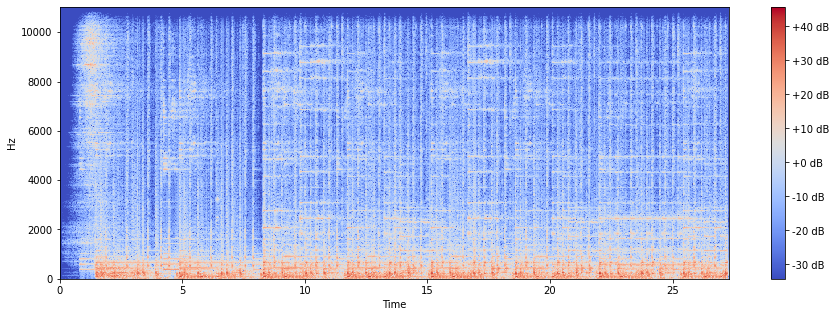

In [6]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(stft_decibel, sr=sampling_rate, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')

In [7]:
stft_phase[:10]

array([[ 3.1415927e+00,  3.1415927e+00,  3.1415927e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-3.1415927e+00, -1.5396721e+00, -6.2378162e-01, ...,
        -1.9928434e+00, -1.9306467e+00, -3.0049124e-01],
       [-3.1415927e+00,  1.2656783e-01,  2.5738535e+00, ...,
         3.0606029e+00,  1.9257623e+00, -6.6808939e-01],
       ...,
       [-4.0144039e-16, -2.4355402e+00, -2.3046794e+00, ...,
         5.2509701e-01, -1.3465452e+00, -3.0428808e+00],
       [-4.7000805e-16, -1.0919166e-01,  1.6073826e-01, ...,
        -1.6904740e+00,  2.7881272e+00,  2.7321670e+00],
       [ 1.7092737e-15,  1.4870552e+00, -2.5736995e+00, ...,
        -2.9170446e+00,  1.7387754e-01,  2.2310905e+00]], dtype=float32)

## constant-Q transform
uses logarithmically-spaced frequency axis...

In [8]:
fmin = librosa.midi_to_hz(36)
C = librosa.cqt(audio, sr=sampling_rate, fmin=fmin, n_bins=72)
logC = librosa.amplitude_to_db(abs(C))

/home/yasu/.local/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


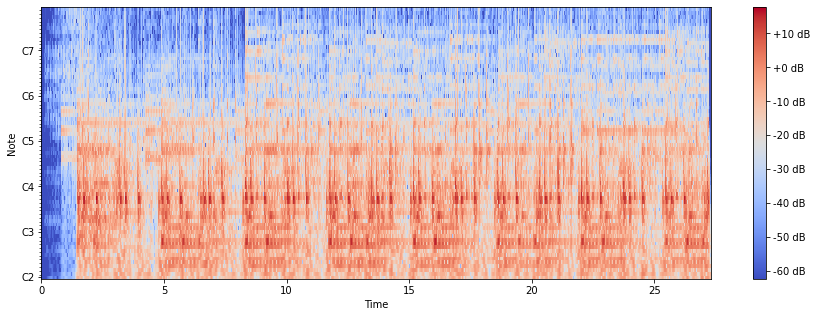

In [9]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(logC, sr=sampling_rate, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')

# reconstruct audio from FFT

The original piece is reconstructed pretty well:

In [10]:
reconstructed_audio = librosa.istft(stft_result)
print(reconstructed_audio.shape)
ipd.Audio(reconstructed_audio, rate=sampling_rate)

(601600,)


It sounds a bit worse when reconstructed without phase data, but I think it's good enough for experimentation.

In [11]:
reconstructed_audio = librosa.istft(stft_magnitude)
print(reconstructed_audio.shape)
ipd.Audio(reconstructed_audio, rate=sampling_rate)

(601600,)
